# **Forbes World’s Best Employers 2023**
 `Listing 700 the world's best employers`
 
- Source: https://www.kaggle.com/datasets/kwongmeiki/forbes-worlds-best-employers-2023 
 
## About Dataset
### Data Source:

- Article Title: World’s Best Employers 2023
- Organisation: Forbes
- Author: Rachel Rabkin Peachman
- Original Data Updated on October 10, 2023
- Retrieved from https://www.forbes.com/lists/worlds-best-employers/?sh=23405a3c1e0c
- Web scrapping:

### Data Overview:

- The dataset encompasses 700 the world's best employers across various sectors, such as retail, IT and etc.
- Each observation represents the employer's (company / institution) name, industry, country / territory, and number of employees.
### Columns:

- Rank (Ordinal): ranking of the employer
- Company (categorical): name of the employer
- Industries (categorical): industry sector of the employer
- Country_territory (categorical): country of company
- Employees (numerical): number of employees
### Useful Tips:

- Dynamic Trend Analysis: through potential data joining with existing dataset (e.g. https://www.kaggle.com/datasets/yasirhameed/forbes-world-best-employers-2022)
- Correlation between size of company and ranking
- Composition of recognised employers among countries / industries
- Exploration Potential: consider exploring the companies both appeared in this ranking and Forbes The Global 2000 (https://www.kaggle.com/datasets/kwongmeiki/forbes-the-global-2000-rankings-2023) which - - indicates financial success, noting that both datasets are in more or less the same time frame of research.

## Data Overview and Data Preprocesing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('forbes_best_employers_2023.csv')
data

,rank,company,industries,country_territory,employees,publish_year
0,1,Samsung Electronics,Conglomerate,South Korea,270372.0,2023
1,2,Microsoft,"IT, Internet, Software & Services",United States,221000.0,2023
2,3,Alphabet,"IT, Internet, Software & Services",United States,190234.0,2023
3,4,Apple,"Semiconductors, Electronics, Electrical Engine...",United States,164000.0,2023
4,5,Ferrari,Automotive (Automotive and Suppliers),Italy,4919.0,2023
...,...,...,...,...,...,...
695,696,Norwegian Cruise Line,Transportation and Logistics,Bermuda,38900.0,2023
696,697,Keppel,Conglomerate,Singapore,17238.0,2023
697,698,Howmet Aerospace,Aerospace & Defense,United States,21400.0,2023
698,699,Magna International,Automotive (Automotive and Suppliers),Canada,174000.0,2023


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               700 non-null    int64  
 1   company            700 non-null    object 
 2   industries         700 non-null    object 
 3   country_territory  700 non-null    object 
 4   employees          696 non-null    float64
 5   publish_year       700 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 32.9+ KB


In [4]:
data.isnull().sum()

rank                 0
company              0
industries           0
country_territory    0
employees            4
publish_year         0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

rank                 0
company              0
industries           0
country_territory    0
employees            0
publish_year         0
dtype: int64

In [7]:
len(data)

696

## Correlation between size of company and ranking

In [8]:
data.head()

,rank,company,industries,country_territory,employees,publish_year
0,1,Samsung Electronics,Conglomerate,South Korea,270372.0,2023
1,2,Microsoft,"IT, Internet, Software & Services",United States,221000.0,2023
2,3,Alphabet,"IT, Internet, Software & Services",United States,190234.0,2023
3,4,Apple,"Semiconductors, Electronics, Electrical Engine...",United States,164000.0,2023
4,5,Ferrari,Automotive (Automotive and Suppliers),Italy,4919.0,2023


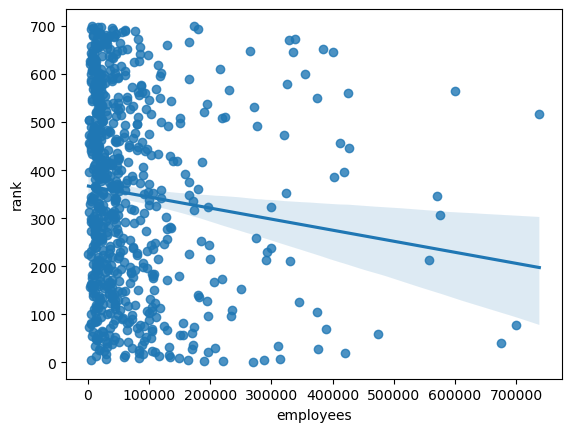

In [9]:
sns.regplot(x=data["employees"], y=data["rank"]);

## Composition of recognised employers among countries / industries

In [10]:
labels = ['Engineering, Manufacturing' ,                                          
'Construction, Oil & Gas Operations, Mining and Chemicals ',                               
'Banking and Financial Services  '  ,                                                      
'Retail and Wholesale ' ,                                                                  
'Automotive (Automotive and Suppliers)  '     ,                                            
'Semiconductors, Electronics, Electrical Engineering, Technology Hardware & Equipment  ' , 
'IT, Internet, Software & Services   ' ,                                                   
'Drugs & Biotechnology'  ,                                                                 
'Conglomerate ' ,                                                                          
'Travel & Leisure '  ,                                                                     
'Transportation and Logistics  '  ,                                                       
'Business Services & Supplies ' ,                                                          
'Insurance'  ,                                                                            
'Clothing, Shoes, Sports Equipment  ' ,                                                    
'Food, Soft Beverages, Alcohol & Tobacco  '   ,                                            
'Utilities'   ,                                                                            
'Aerospace & Defense'  ,                                                                   
'Professional Services '  ,                                                                
'Telecommunications Services, Cable Supplier  '  ,                                         
'Media & Advertising '   ,                                                                 
'Packaged Goods     '     ,                                                                
'Health Care Equipment & Services ',                                                     
'Restaurants  '  ,                                                                         
'Healthcare & Social '                                                                 
 ]              

In [11]:
data.drop(data[data['industries'] == 'Drugs and Biotechnology'].index, inplace=True)

In [12]:
explodes = []
for i in range(len(labels)):
    explodes.append(0.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_10120\4050180962.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


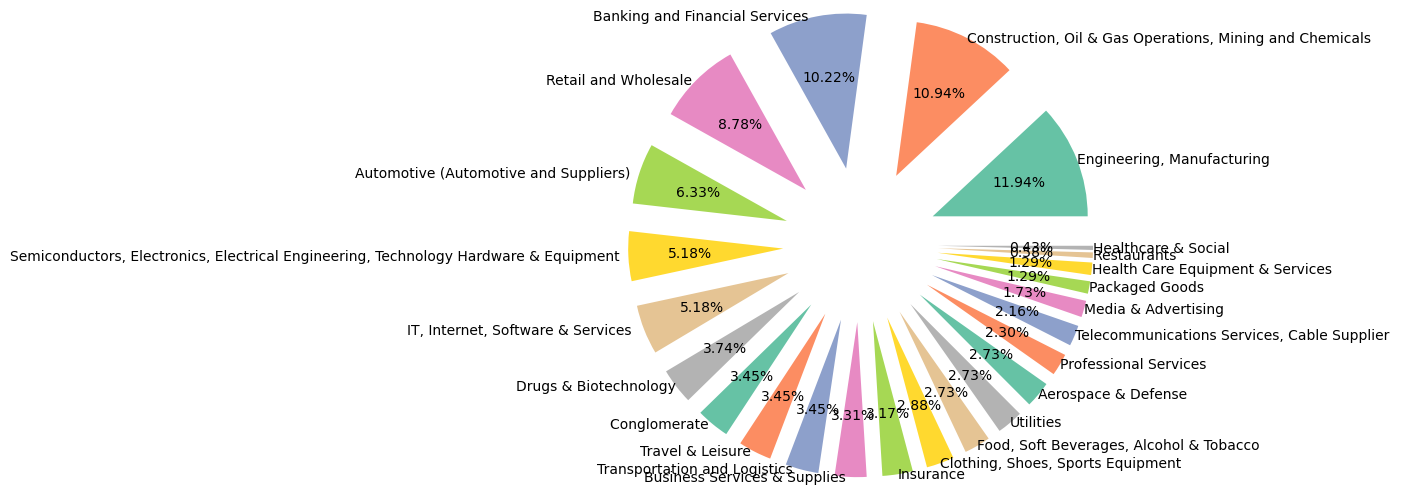

In [52]:
fig, ax = plt.subplots(figsize=(5,7))
ax.pie(x=data.industries.value_counts(), labels=labels, autopct='%1.2f%%',
      colors=sns.color_palette('Set2'),
      startangle=360,
      labeldistance=1,
      explode=explodes);



In [27]:
data['industries'].unique()

array(['Conglomerate', 'IT, Internet, Software & Services',
       'Semiconductors, Electronics, Electrical Engineering, Technology Hardware & Equipment',
       'Automotive (Automotive and Suppliers)', 'Retail and Wholesale',
       'Aerospace & Defense', 'Clothing, Shoes, Sports Equipment',
       'Banking and Financial Services', 'Transportation and Logistics',
       'Packaged Goods', 'Drugs & Biotechnology',
       'Food, Soft Beverages, Alcohol & Tobacco',
       'Travel & Leisure\xa0\xa0\xa0\xa0\xa0\xa0', 'Healthcare & Social',
       'Engineering, Manufacturing', 'Utilities', 'Media & Advertising',
       'Insurance', 'Health Care Equipment & Services',
       'Construction, Oil & Gas Operations, Mining and Chemicals',
       'Business Services & Supplies',
       'Telecommunications Services, Cable Supplier',
       'Professional Services', 'Restaurants'], dtype=object)

In [28]:
industries_data = data['industries']

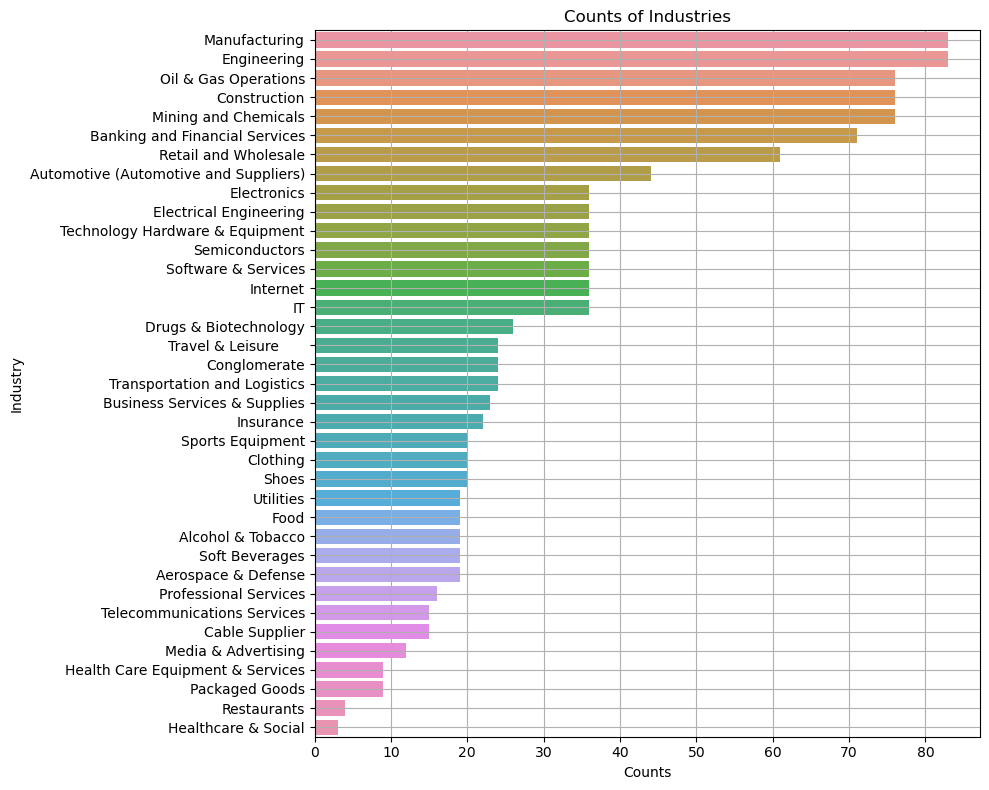

In [33]:
all_industries = ', '.join(industries_data).split(', ')

industries_counts = pd.DataFrame(all_industries, columns=['Industry'])

# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(y='Industry', data=industries_counts, order=industries_counts['Industry'].value_counts().index)

plt.xlabel('Counts')
plt.ylabel('Industry')
plt.title('Counts of Industries')

plt.grid(True)
plt.tight_layout()

plt.show()

In [37]:
countries_data = data['country_territory'].value_counts(ascending=False)

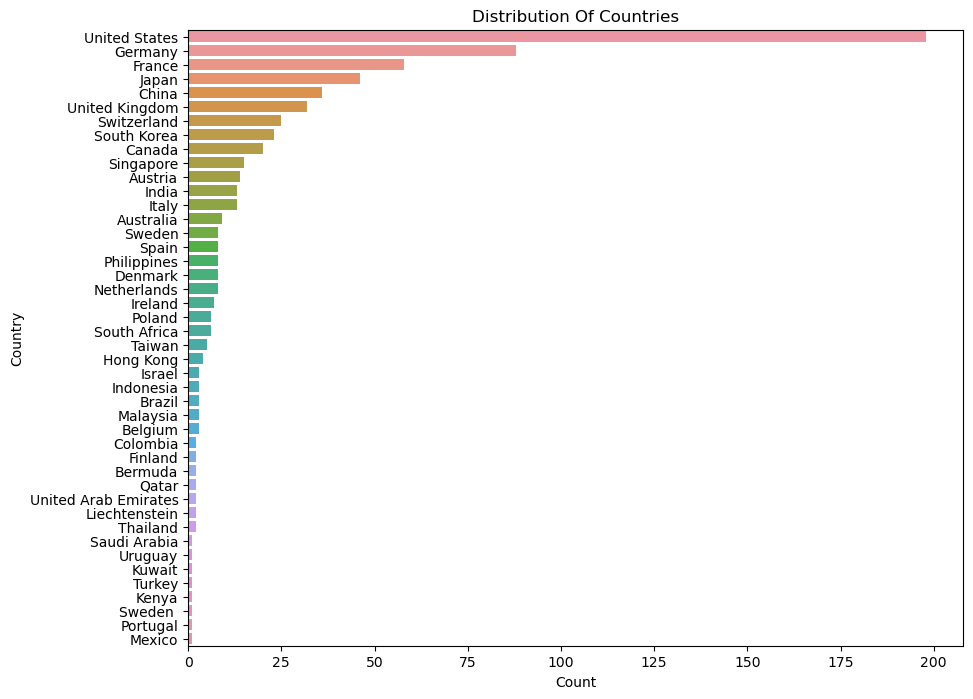

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(y='country_territory', data=data, order=data['country_territory'].value_counts().index)

plt.title('Distribution Of Countries')
plt.xlabel('Count')
plt.ylabel('Country')

plt.show()

## Averate employee count for each industry

In [42]:
employee_industry_avarage = data.groupby('industries')['employees'].mean()

In [43]:
employee_industry_avarage

industries
Aerospace & Defense                                                                      65071.736842
Automotive (Automotive and Suppliers)                                                   124288.636364
Banking and Financial Services                                                           57082.323944
Business Services & Supplies                                                             57018.000000
Clothing, Shoes, Sports Equipment                                                        55242.400000
Conglomerate                                                                            102616.750000
Construction, Oil & Gas Operations, Mining and Chemicals                                 43617.631579
Drugs & Biotechnology                                                                    53790.230769
Engineering, Manufacturing                                                               49023.674699
Food, Soft Beverages, Alcohol & Tobacco                                

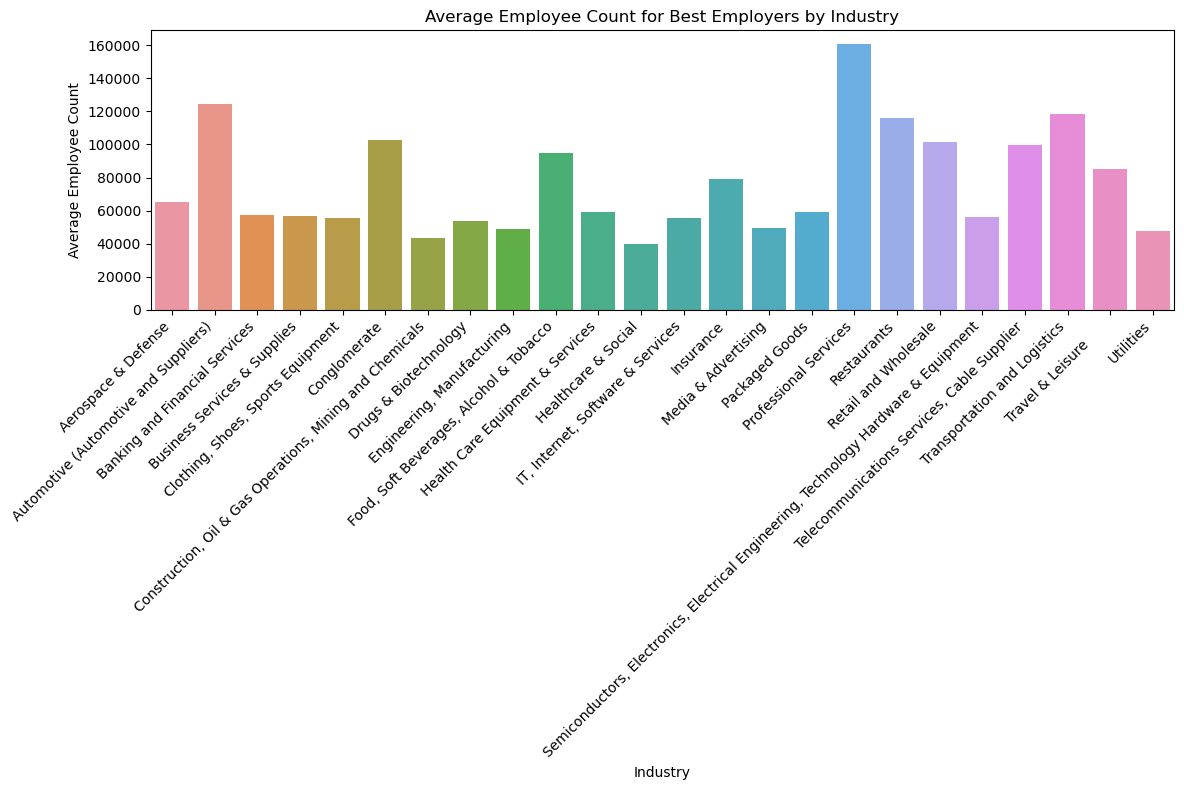

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x=employee_industry_avarage.index, y=employee_industry_avarage.values)

plt.title('Average Employee Count for Best Employers by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Employee Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()